#**Intro**
This data shows whether a customer is satisfied with the airlines or not after travelling with them. There are several other measurement or to say feedback taken from the customers as well as their demographic data is also recorded.

#**importing library modules**

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


#**loading dataset to pandas environment**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**loading .csv file into a pandas dataframe**

In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/DSA_Team_7/Airline.csv')

In [5]:
dataset

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


This dataset contain 129880 rows of records and 23 columns

Here we can see that a column named 'Satisfaction': this is our target column, our main objective of this study based on this column. Hence we can say that this is a supervisory learning  

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

#**Features Analysis**

In [7]:
dataset.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [8]:
dataset.dtypes.value_counts()

int64      17
object      5
float64     1
dtype: int64

In this dataset there is a mix of different datatypes. such as object,int64 & float64.

categorical Features: satisfaction,Gender,Customer Type, Type of Travel, Class

Numerical Features : Age, Flight Distance, Seat comfort, Departure/Arrival time convenient, Food and drink, Gate location, Inflight wifi service, Inflight entertainment, Online support, Ease of Online booking, On-board service, Leg room service, Baggage handling, Checkin service, Cleanliness, Online boarding, Departure Delay in Minutes, Arrival Delay in Minutes.

#**Descriptive Statistics**

The .describe() method will give you the statistics of the columns.

Here is the output:

In [9]:
dataset.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#**Missing Value identify**

In [10]:
dataset.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Above we can see that 393 null values are in the dataset. we will handle the null values later by preprocessing the data for model building

#**Unique value in each categorical columns**

In [11]:
for columns in dataset.select_dtypes('object').columns: # loop for filtering categorical columns
  print('column name :',columns,'Number of Unique Value: ',dataset[columns].nunique(),'Unique Values :',dataset[columns].unique())#printing all categorical columns with uniques values

column name : satisfaction Number of Unique Value:  2 Unique Values : ['satisfied' 'dissatisfied']
column name : Gender Number of Unique Value:  2 Unique Values : ['Female' 'Male']
column name : Customer Type Number of Unique Value:  2 Unique Values : ['Loyal Customer' 'disloyal Customer']
column name : Type of Travel Number of Unique Value:  2 Unique Values : ['Personal Travel' 'Business travel']
column name : Class Number of Unique Value:  3 Unique Values : ['Eco' 'Business' 'Eco Plus']


####**size of each unique values in each categorycal features**

In [12]:
for i in dataset.select_dtypes('object').columns: # loop for filtering categorical columns
  print(dataset[[i]].groupby(i).size(),'\n'+'------------------') # printing all categorical columns with uniques values count

satisfaction
dissatisfied    58793
satisfied       71087
dtype: int64 
------------------
Gender
Female    65899
Male      63981
dtype: int64 
------------------
Customer Type
Loyal Customer       106100
disloyal Customer     23780
dtype: int64 
------------------
Type of Travel
Business travel    89693
Personal Travel    40187
dtype: int64 
------------------
Class
Business    62160
Eco         58309
Eco Plus     9411
dtype: int64 
------------------


#**Outlier detection**

In [13]:
dt = dataset.copy()# copying the original dataset to a new dataset
dt = dt.drop([column for column in dt.select_dtypes('object').columns],axis=1)#droping the categorical columns from the dataset

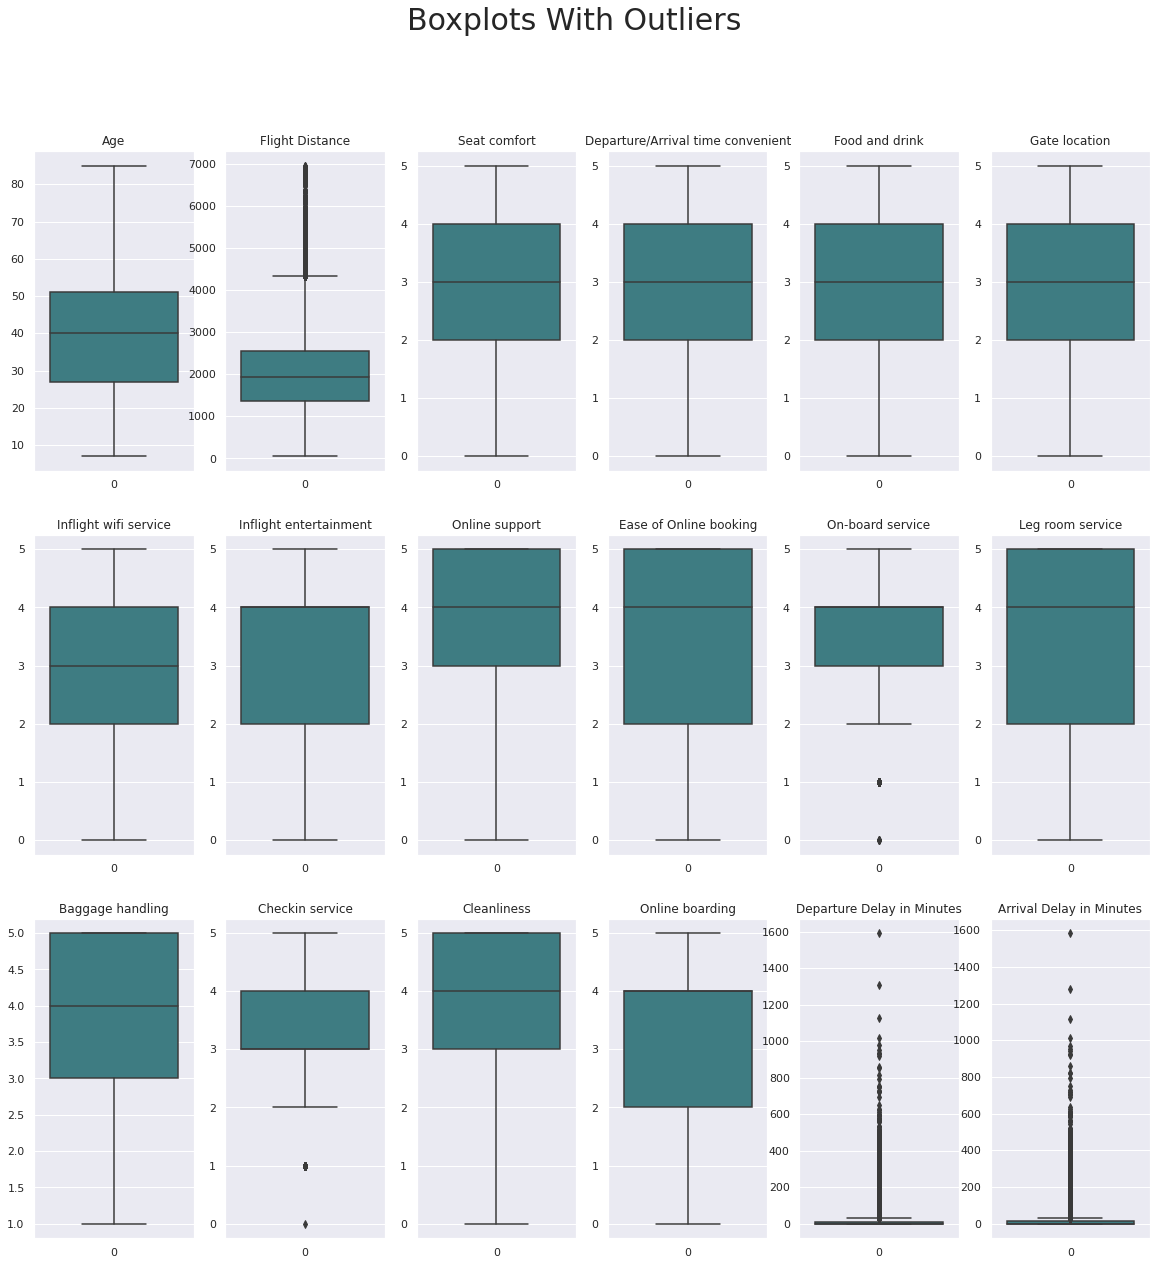

In [14]:
plt.figure(figsize=(20, 20))# setting the plot area

for i, column in enumerate(dt):
    plt.subplot(3, 6, i + 1)# setting the subplot for each columns in 3 rows and 6 columns
    sns.boxplot(data=dt[column],palette="crest")
    plt.title(column)

plt.suptitle("Boxplots With Outliers", size=30)
plt.show()

as seen in the above boxplot, we can see some outliers relies in Flight Distance,On-board service, checkin service, departure delay in minutes & Arrival delay in minutes. we have to remove those outliers by preprocessing the data before the model building. There are many methods to remove otliers: Z-Score, IQR Score

#**Visualizations**

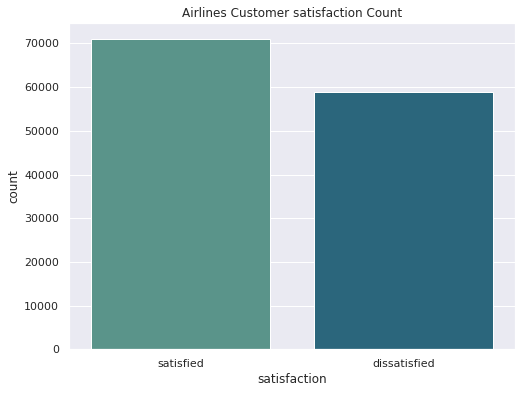

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x="satisfaction", data=dataset,palette='crest')
plt.title('Airlines Customer satisfaction Count')
plt.show()

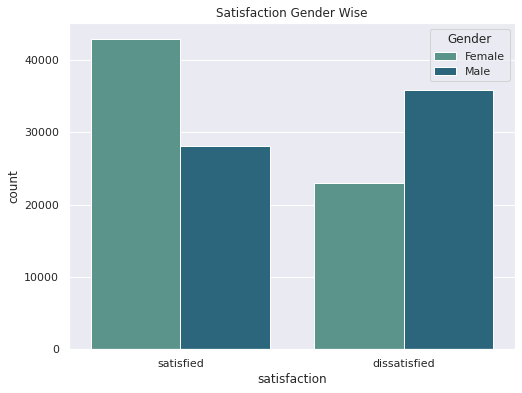

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x="satisfaction",hue="Gender",data=dataset,palette='crest')
plt.title('Satisfaction Gender Wise')
plt.show()

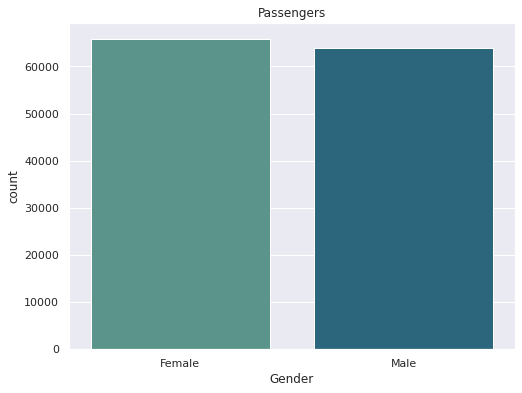

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x="Gender", data=dataset,palette='crest')
plt.title('Passengers')
plt.show()

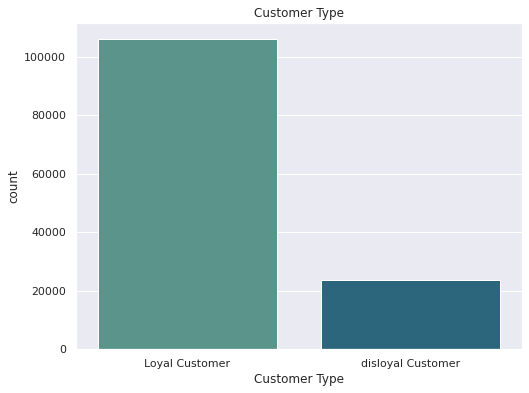

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x="Customer Type", data=dataset,palette="crest")
plt.title('Customer Type')
plt.show()

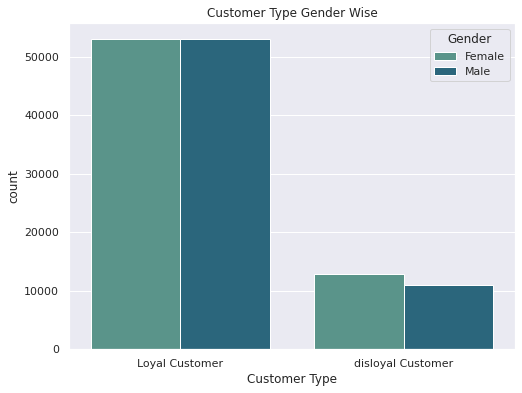

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x="Customer Type",hue="Gender",data=dataset,palette="crest")
plt.title('Customer Type Gender Wise')
plt.show()

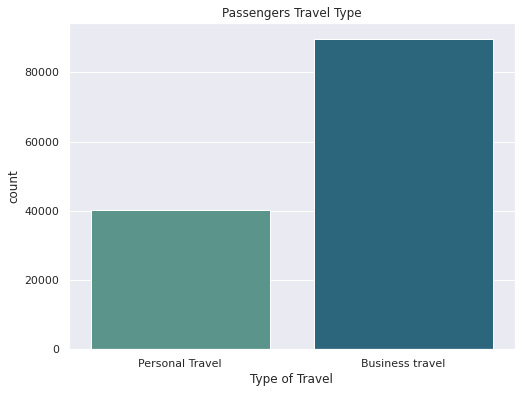

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x="Type of Travel", data=dataset,palette="crest")
plt.title('Passengers Travel Type')
plt.show()

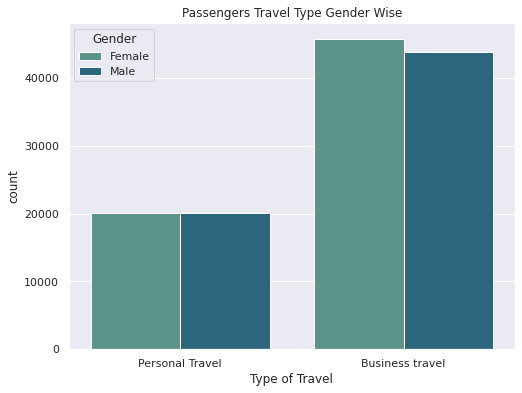

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x="Type of Travel",hue="Gender", data=dataset,palette="crest")
plt.title('Passengers Travel Type Gender Wise')
plt.show()

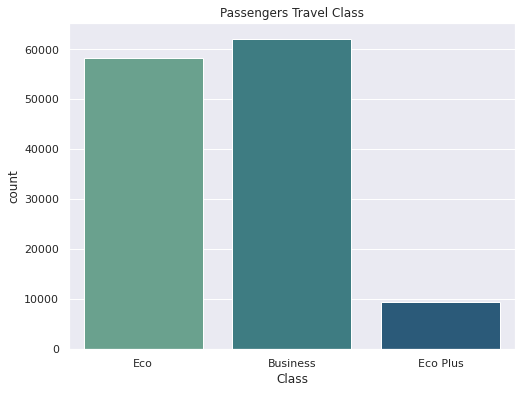

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x="Class", data=dataset,palette="crest")
plt.title('Passengers Travel Class')
plt.show()

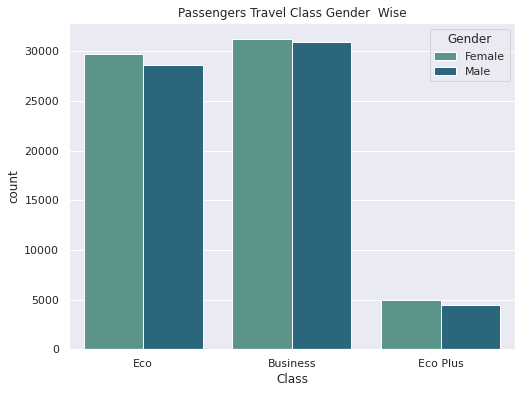

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x="Class",hue="Gender",data=dataset,palette="crest")
plt.title('Passengers Travel Class Gender  Wise')
plt.show()

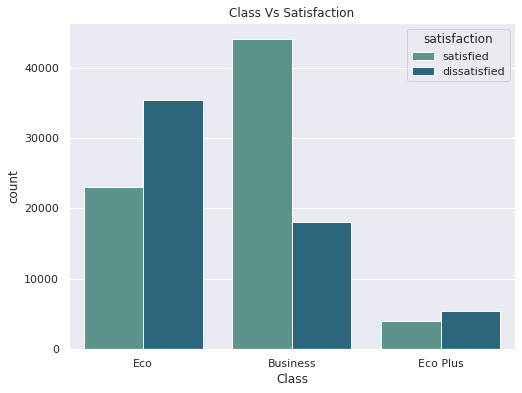

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x="Class",hue="satisfaction",data=dataset,palette="crest")
plt.title('Class Vs Satisfaction')
plt.show()

<Figure size 576x432 with 0 Axes>

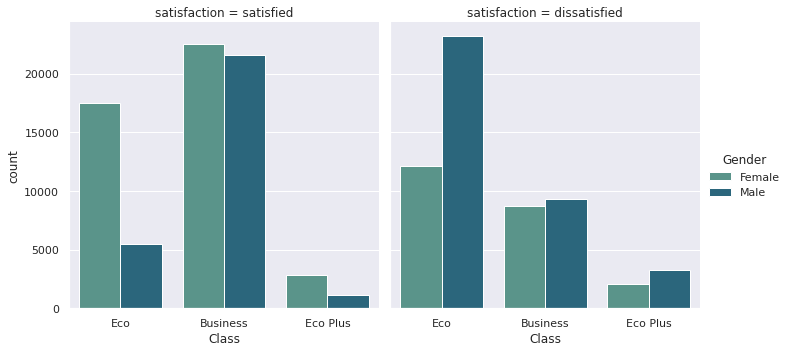

In [25]:
plt.figure(figsize=(8,6))
sns.catplot(x="Class",col="satisfaction",hue="Gender",data=dataset,kind="count",palette="crest")
plt.show()

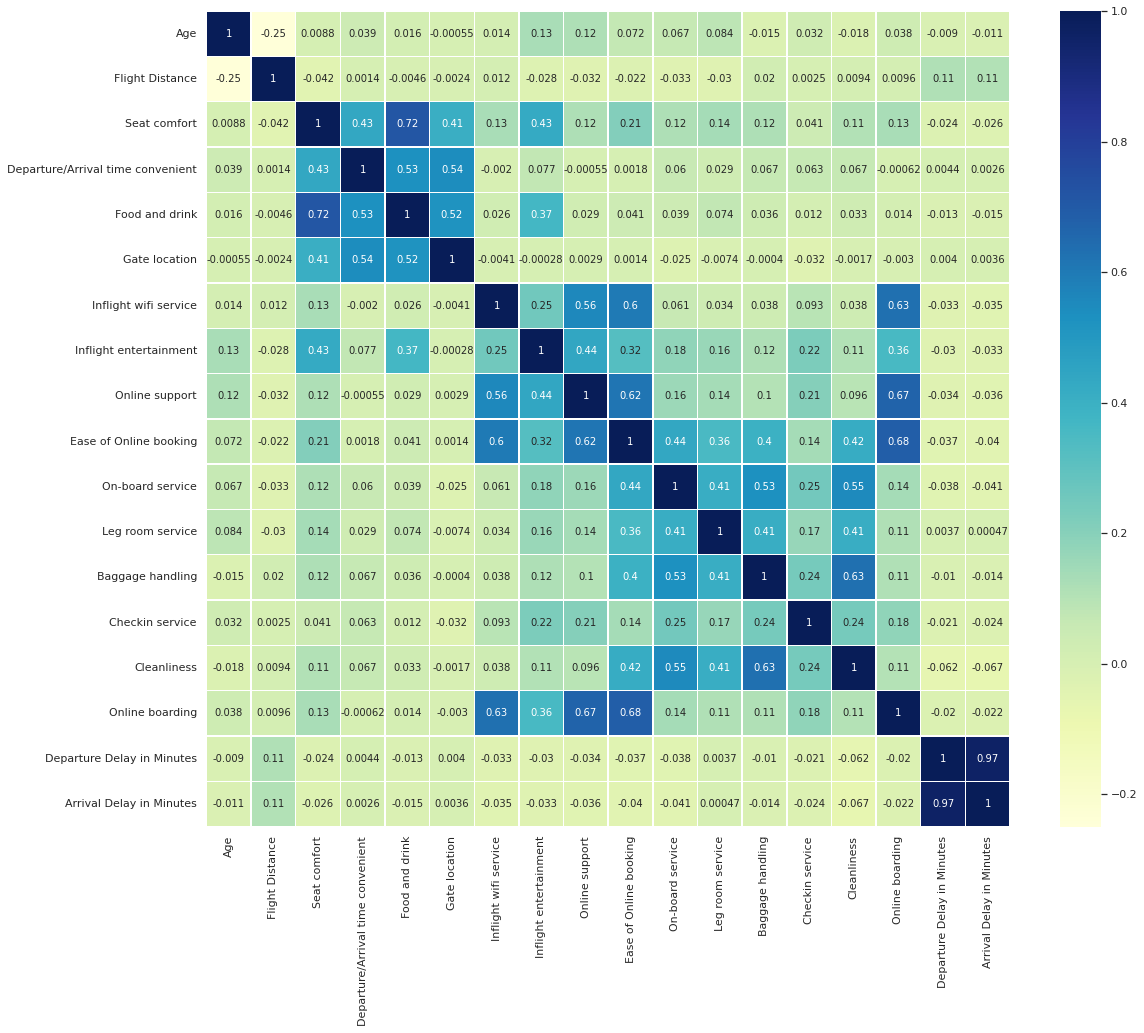

In [26]:
plt.figure(figsize=(18,15))
sns.heatmap(dataset.corr(),annot=True,cmap="YlGnBu",linewidths=.5)